In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_AG_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,NaN,0.3337,NaN,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,NaN,0.5598,NaN,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,NaN,0.0598,NaN,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,NaN,0.1945,NaN,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	41
float64		column 5	0
float64		column 6	0
float64		column 7	0
float64		column 8	41
float64		column 9	41
float64		column 10	41
float64		column 11	82
float64		column 12	0
float64		column 13	82
float64		column 14	82
float64		column 15	0
float64		column 16	82
float64		column 17	82
float64		column 18	82
float64		column 19	82
float64		column 20	82
float64		column 21	82
float64		column 22	82
float64		column 23	41
float64		column 30	82
float64		column 25	82
float64		column 26	82
float64		column 27	82
float64		column 28	0
float64		column 29	0
float64		column 30	82
float64		column 31	0
float64		column 32	82
float64		column 33	41
float64		column 34	82
float64		column 35	41
float64		column 36	82
float64		column 37	82
float64		column 38	82
float64		column 39	41
float64		column 40	41
float64		column 41	0
float64		column 42	41
float64		column 43	0
float64		column 44	82
float64		column 

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,208.000000,208.000000,208.000000,167.000000,208.000000,208.000000,208.000000,167.000000,167.000000,167.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.051087,0.075202,0.104570,0.121747,0.129720,0.177816,0.203244,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.038450,0.055552,0.059105,0.061788,0.077133,0.113419,0.128037,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.011700,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.023400,0.038050,0.067025,0.080900,0.080750,0.097350,0.107100,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044000,0.062500,0.092150,0.106950,0.110800,0.146600,0.183800,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.062100,0.100275,0.134125,0.154000,0.166450,0.234050,0.266400,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.260400,0.401000,0.382300,0.372900,0.459000,0.658700,0.660900,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

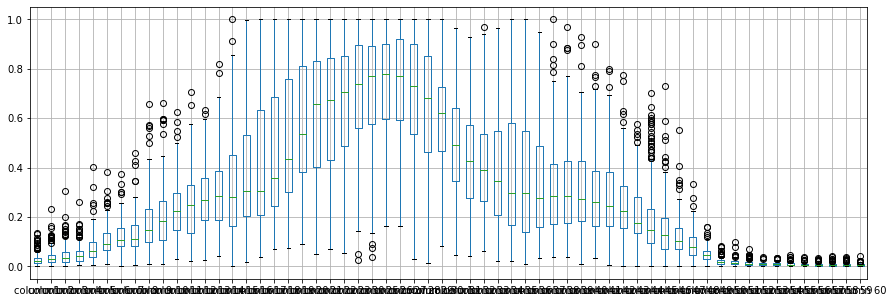

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.029164
column 2       0.038437
column 3       0.043832
column 4       0.051087
column 5       0.075202
column 6       0.104570
column 7       0.121747
column 8       0.129720
column 9       0.177816
column 10      0.203244
column 11      0.234603
column 12      0.250221
column 13      0.276782
column 14      0.300005
column 15      0.320201
column 16      0.374423
column 17      0.412263
column 18      0.451629
column 19      0.509117
column 20      0.570002
column 21      0.615473
column 22      0.639998
column 23      0.659581
column 30      0.693933
column 25      0.698143
column 26      0.724271
column 27      0.741374
column 28      0.694024
column 29      0.642074
column 30.1    0.602579
column 31      0.504475
column 32      0.434604
column 33      0.411326
column 34      0.388647
column 35      0.376527
column 36      0.372515
column 37      0.349744
column 38      0.317467
column 39      0.327114
column 40      0.310401
column 41      0.289252
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.735896,0.571537,0.284609,0.344797,0.238921,0.260815,0.343729,0.301423,0.348091,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
column 2,0.735896,1.000000,0.779916,0.424258,0.419669,0.332329,0.279040,0.289635,0.301347,0.268291,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
column 3,0.571537,0.779916,1.000000,0.686412,0.546141,0.346275,0.190434,0.155928,0.289988,0.173615,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
column 4,0.284609,0.424258,0.686412,1.000000,0.628877,0.368387,0.229105,0.409331,0.242551,0.204167,...,0.201147,0.306185,0.352119,0.369716,0.268650,0.407046,0.431677,0.391256,0.440070,0.302455
column 5,0.344797,0.419669,0.546141,0.628877,1.000000,0.597053,0.335422,0.220771,0.114436,0.250652,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
column 6,0.238921,0.332329,0.346275,0.368387,0.597053,1.000000,0.702889,0.422895,0.269355,0.339204,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
column 7,0.260815,0.279040,0.190434,0.229105,0.335422,0.702889,1.000000,0.655242,0.431017,0.485570,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
column 8,0.343729,0.289635,0.155928,0.409331,0.220771,0.422895,0.655242,1.000000,0.752228,0.669104,...,0.246447,0.211273,0.063571,0.201248,0.244929,0.094614,0.160111,0.269060,0.124491,0.149470
column 9,0.301423,0.301347,0.289988,0.242551,0.114436,0.269355,0.431017,0.752228,1.000000,0.886275,...,0.180026,0.116309,0.043778,0.226717,0.172147,0.283564,0.226483,0.245476,0.127288,0.047513
column 10,0.348091,0.268291,0.173615,0.204167,0.250652,0.339204,0.485570,0.669104,0.886275,1.000000,...,0.170025,0.144620,0.087326,0.115112,0.155143,0.062191,0.103039,0.142576,0.020568,0.124997


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+14,60+14+14,60+14+14+14,60+14+14,60+14,60], vae_layer = False, seed = 140)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 13.72161182990441
Epoch: 1 , loss: 13.555952805739183
Epoch: 2 , loss: 13.479831548837515
Epoch: 3 , loss: 13.393243679633507
Epoch: 4 , loss: 13.273960040165829
Epoch: 5 , loss: 13.27658198429988
Epoch: 6 , loss: 13.190852385300856
Epoch: 7 , loss: 13.169923342191256
Epoch: 8 , loss: 13.07303369962252
Epoch: 9 , loss: 13.019592505234938
Epoch: 10 , loss: 12.945443520179161
Epoch: 11 , loss: 12.788813811082106
Epoch: 12 , loss: 12.701736963712252
Epoch: 13 , loss: 12.563460350036621
Epoch: 14 , loss: 12.342788989727314
Epoch: 15 , loss: 12.109225860008827
Epoch: 16 , loss: 11.822057503920336
Epoch: 17 , loss: 11.2879120019766
Epoch: 18 , loss: 10.787710703336275
Epoch: 19 , loss: 10.008793904231144
Epoch: 20 , loss: 9.023273614736704
Epoch: 21 , loss: 8.239873996147743
Epoch: 22 , loss: 7.777224760789138
Epoch: 23 , loss: 7.47677494929387
Epoch: 24 , loss: 7.188209313612718
Epoch: 25 , loss: 6.98385267

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.0664
column 2       0.0575
column 3       0.0842
column 4       0.0372
column 5       0.0458
column 6       0.0771
column 7       0.0771
column 8       0.1130
column 9       0.2353
column 10      0.1838
column 11      0.2869
column 12      0.4129
column 13      0.3647
column 14      0.1984
column 15      0.2840
column 16      0.4039
column 17      0.5837
column 18      0.6792
column 19      0.6086
column 20      0.4858
column 21      0.3246
column 22      0.2013
column 23      0.2082
column 30      0.1686
column 25      0.2484
column 26      0.2736
column 27      0.2984
column 28      0.4655
column 29      0.6990
column 30.1    0.7474
column 31      0.7956
column 32      0.7981
column 33      0.6715
column 34      0.6942
column 35      0.7440
column 36      0.8169
column 37      0.8912
column 38      1.0000
column 39      0.8753
column 40      0.7061
column 41      0.6803
column 42      0.5898
column 43      0.4618
column 44      0.3639
column 45      0.1492
column 46 

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.232066,0.000000,-0.113656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.272662,0.000000,-0.457489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.046177,0.000000,-0.004073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005965,0.000000,-0.053637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

12.926716150933759

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.2900900566286725

In [19]:
new_df.iloc[66,:]

column 1       0.0265
column 2       0.0440
column 3       0.0137
column 4       0.0084
column 5       0.0305
column 6       0.0438
column 7       0.0341
column 8       0.0780
column 9       0.0844
column 10      0.0779
column 11      0.0327
column 12      0.2060
column 13      0.1908
column 14      0.1065
column 15      0.1457
column 16      0.2232
column 17      0.2070
column 18      0.1105
column 19      0.1078
column 20      0.1165
column 21      0.2224
column 22      0.0689
column 23      0.2060
column 30      0.2384
column 25      0.0904
column 26      0.2278
column 27      0.5872
column 28      0.8457
column 29      0.8467
column 30.1    0.7679
column 31      0.8055
column 32      0.6260
column 33      0.6545
column 34      0.8747
column 35      0.9885
column 36      0.9348
column 37      0.6960
column 38      0.5733
column 39      0.5872
column 40      0.6663
column 41      0.5651
column 42      0.5247
column 43      0.3684
column 44      0.1997
column 45      0.1512
column 46 

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.020700,0.0954,0.0986,0.1539,0.160100,0.310900,0.211100,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.068900,0.1183,0.2583,0.2156,0.116034,0.333700,0.173544,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.108300,0.0974,0.2280,0.2431,0.104438,0.559800,0.161911,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.020500,0.0205,0.0368,0.1098,0.081423,0.059800,0.122327,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.039400,0.0590,0.0649,0.1209,0.246700,0.356400,0.445900,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.017700,0.0393,0.1630,0.2028,0.169400,0.232800,0.268400,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.056400,0.0760,0.0958,0.0990,0.101800,0.103000,0.215400,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.029200,0.0351,0.1171,0.1257,0.117800,0.125800,0.252900,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.060800,0.0167,0.1354,0.1465,0.118265,0.194500,0.181763,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [21]:
imputations[-1].to_excel("Sonar_AG_20(imp).xlsx", index=False, header=False)